# Project 2 - IIR Design

In [728]:
from scipy import signal
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np

Ts = 0.0001 seconds
b = [8.92353044e+15]
a = [1.00000000e+00 1.50467919e+04 2.71116644e+08 2.03491520e+12
 9.45228286e+15]


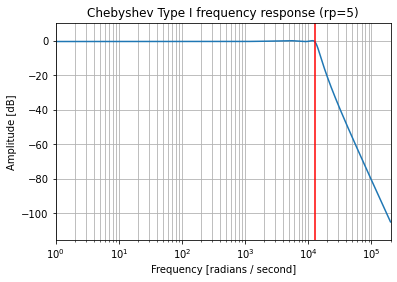

In [729]:
f1 = 2_000
w1 = 2 * np.pi * f1

fs = 10_000
ws = 2 * np.pi * fs

Ts = 1/fs
print(f'Ts = {Ts} seconds')

N = 200_000

b, a = signal.cheby1(4, 0.5, w1, 'low', analog=True)

print(f'b = {b}')
print(f'a = {a}')
freqs = np.linspace(0, N, N+1)
w, h = signal.freqs(b, a, freqs)

#plt.plot(w,  abs(h))
plt.semilogx(w,  20 * np.log10(abs(h)))

plt.title('Chebyshev Type I frequency response (rp=5)')

plt.xlabel('Frequency [radians / second]')

plt.ylabel('Amplitude [dB]')

plt.margins(0, 0.1)

plt.grid(which='both', axis='both')

plt.axvline(w1, color='red') # cutoff frequency

#plt.axhline(-5, color='green') # rp

plt.show()

In [730]:
poles = np.roots(a)
print(poles)

[-2203.55166068+12770.6104878j  -2203.55166068-12770.6104878j
 -5319.8443046  +5289.76006383j -5319.8443046  -5289.76006383j]


For a Chebyshev filter with
$ A_p = 0.5dB, and f_1 = 2kHz $
<div></div>
Through Partial differentiation we get

$H(s) = 0.379051 * \left[ \frac{A}{(S - P_1)} + \frac{B}{(S - P_1^*)} + \frac{C}{(S - P_2)} + \frac{D}{(S - P_2^*)} \right]$

In [731]:
s = poles[0]

mult = (s - poles[1])*(s - poles[2]) * (s - poles[3])
A = 1 / mult

s = poles[1]
mult = (s - poles[0])*(s - poles[2])*(s - poles[3])
B = 1 / mult

s = poles[2]
mult = (s - poles[0])*(s - poles[1])*(s - poles[3])
C = 1 / mult

s = poles[3]
mult = (s - poles[0])*(s - poles[1])*(s - poles[2])
D = 1 / mult

print(f'A = {A}')
print(f'B = {B}')
print(f'C = {C}')
print(f'D = {D}')
print('\n')
amag = np.abs(A)
adeg = np.angle(A)

bmag = np.abs(B)
bdeg = np.angle(B)

cmag = np.abs(C)
cdeg = np.angle(C)

dmag = np.abs(D)
ddeg = np.angle(D)



print(f'{amag}e ^ {adeg}')
print(f'{bmag}e ^ {bdeg}')
print(f'{cmag}e ^ {cdeg}')
print(f'{dmag}e ^ {ddeg}')

A = (-1.4126913024731413e-13+2.2256140602395858e-13j)
B = (-1.4126913024731416e-13-2.2256140602395863e-13j)
C = (1.4126913024731416e-13-6.205349463383327e-13j)
D = (1.4126913024731416e-13+6.205349463383327e-13j)


2.6361059654762355e-13e ^ 2.1363706595038074
2.636105965476236e-13e ^ -2.1363706595038074
6.364122773705344e-13e ^ -1.3469543480466044
6.364122773705344e-13e ^ 1.3469543480466044


$H_A(t) = 0.379051 * \left[ |A|e^{<A}e^{-P_1t}u(t) + |B|e^{<B}e^{-P_2t}u(t) + |C|e^{<C}e^{-P_3t}u(t) + |D|e^{<D}e^{-P_4t}u(t) \right] $
$H_D(t) = 0.379051 * \left[ |A|e^{<A}e^{-P_1nt}u(nt) + |B|e^{<B}e^{-P_2nt}u(nt) + |C|e^{<C}e^{-P_3nt}u(nt) + |D|e^{<D}e^{-P_4nt}u(nt) \right] $
$H_D(z) = 0.379051 * \left[ |A|e^{<A} \frac{z}{z - e^{-P_1T}} + |B|e^{<B} \frac{z}{z - e^{-P_1^*T}} + |C|e^{<C} \frac{z}{z - e^{-P_2T}} + |D|e^{<D} \frac{z}{z - e^{-P_2^*T}} \right] $

Poles of Z:

P1z = (0.2322703805548544+0.7678734101898077j) = 0.802233821126747e ^ 1.277061048779527
P2z = (0.2322703805548544-0.7678734101898077j) = 0.802233821126747e ^ -1.277061048779527
P3z = (0.5071495599681521+0.29645037406466235j) = 0.5874380822341777e ^ 0.5289760063828892
P4z = (0.5071495599681521-0.29645037406466235j) = 0.5874380822341777e ^ -0.5289760063828892
ZPmax1 = 0.802233821126747


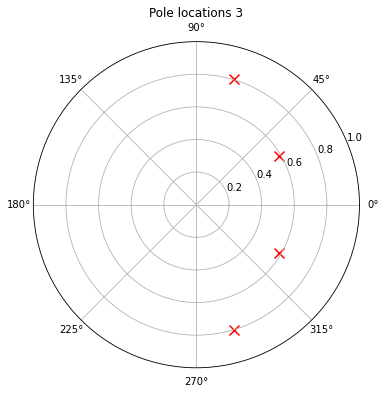

In [732]:
print('Poles of Z:\n')

p1z = np.e ** (poles[0] * Ts)
p2z = np.e ** (poles[1] * Ts)
p3z = np.e ** (poles[2] * Ts)
p4z = np.e ** (poles[3] * Ts)

z_poles = [p1z, p2z, p3z, p4z]

for i in range(len(z_poles)):
    print(f'P{i+1}z = {z_poles[i]} = {np.abs(z_poles[i])}e ^ {np.angle(z_poles[i])}')



print(f'ZPmax1 = {max(np.abs(z_poles))}')

fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(projection='polar')
ax.set_title("Pole locations 3")
ax.set_ylim([0,1])
c = ax.scatter(np.angle(z_poles), np.abs(z_poles), s=100, c='red', marker='x')
plt.show()

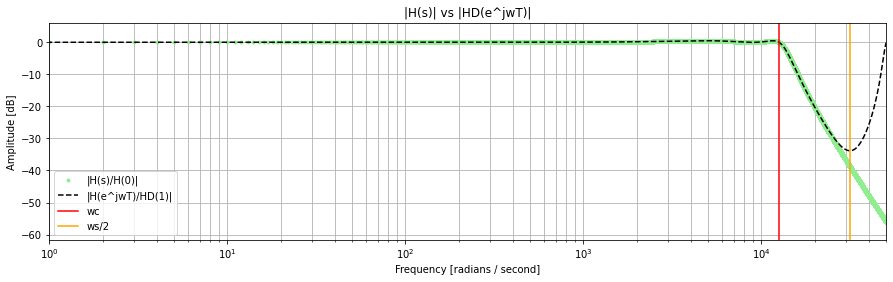

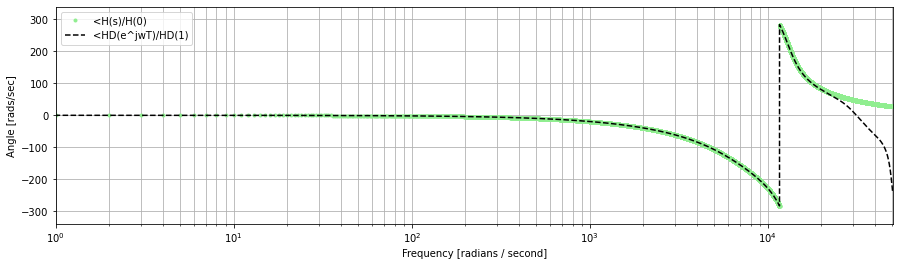

In [733]:
#ejwT = np.e ** (w * complex(0, 1) * Ts)
z = np.e ** (w * complex(0, 1) * Ts)
#H_DD = (A /(ejwT  - poles[0])) + (B /(ejwT  - poles[1])) + (C /(ejwT  - poles[2])) * (D /(ejwT  - poles[3]))
H_DD = (A * (z/(z - p1z))) + (B * (z/(z - p2z))) + (C * (z/(z - p3z))) + (D * (z/(z - p4z))) 

H_D = 0.379051 * H_DD

nn = int(2 * np.pi * 8_000) + 1

plt.figure().set_figwidth(15)
plt.margins(0, 0.1)
plt.semilogx(w[:nn],  20 * np.log10(np.abs(h[:nn]/h[0])), '.', c='lightgreen', label = '|H(s)/H(0)|')
plt.semilogx(w[:nn], 20 * np.log10(np.abs(H_D[:nn]/H_D[1])), '--', c='black', label = '|H(e^jwT)/HD(1)|')

plt.title('|H(s)| vs |HD(e^jwT)|')

plt.xlabel('Frequency [radians / second]')

plt.ylabel('Amplitude [dB]')

plt.grid(which='both', axis='both')

plt.axvline(w1, color='red', label='wc') # cutoff frequency

plt.axvline(ws/2, color='orange', label = 'ws/2') # cutoff frequency

plt.legend()
plt.show()


plt.figure().set_figwidth(15)
plt.margins(0, 0.1)
plt.ylabel('Angle [rads/sec]')
plt.xlabel('Frequency [radians / second]')
plt.semilogx(w[:nn],  90 * np.angle(h[:nn]/h[0]), '.', c='lightgreen', label = '<H(s)/H(0)')
plt.semilogx(w[:nn],  90 * np.angle(H_D[:nn]/H_D[1]), '--', c='black', label = '<HD(e^jwT)/HD(1)')
plt.grid(which='both', axis='both')
plt.legend()
plt.show()

Bilinear Method
<div></div>
$ H(z)=  \frac{0.379051}{\left(\frac{2z - 2}{Tz-T} - P1\right)\left(\frac{2z - 2}{Tz-T} - P1^*\right)\left(\frac{2z - 2}{Tz-T} - P2\right)\left(\frac{2z - 2}{Tz-T} - P2^*\right)} $

(array([0]),)
P1z = (0.35369722507532136+0.7785934540581809j) = 0.8551663544178005e ^ 1.1443912077398843
P2z = (0.35369722507532136-0.7785934540581809j) = 0.8551663544178005e ^ -1.1443912077398843
P3z = (0.5137198994024701+0.31624266624057745j) = 0.6032557989717408e ^ 0.551806526884585
P4z = (0.5137198994024701-0.31624266624057745j) = 0.6032557989717408e ^ -0.551806526884585
ZPmax1 = 0.8551663544178005


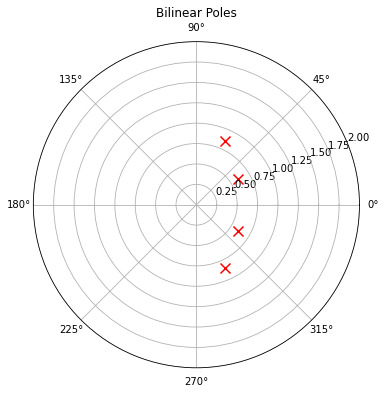

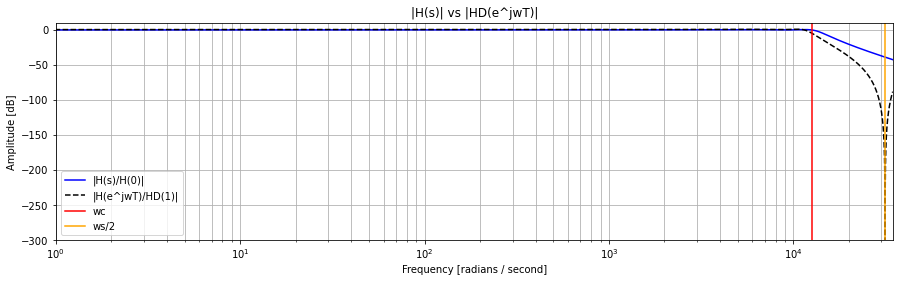

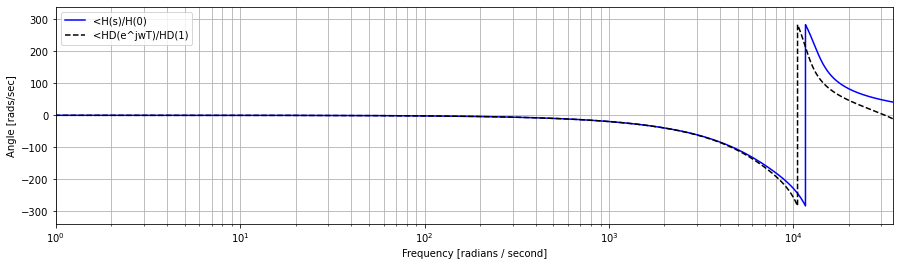

In [738]:
z_bi_poles = (2 + (poles * Ts))/(2 - (poles * Ts))
bilin = (2*(z - 1))/(Ts * (z + 1))
print(np.where(bilin == 0))
Hz_b = (bilin - poles[0]) * (bilin - poles[1]) * (bilin - poles[2]) * (bilin - poles[3])
Hz_b = 0.379051 / Hz_b

for i in range(len(z_bi_poles)):
    print(f'P{i+1}z = {z_bi_poles[i]} = {np.abs(z_bi_poles[i])}e ^ {np.angle(z_bi_poles[i])}')

nn = int(2 * np.pi * 5_500) + 1

print(f'ZPmax1 = {max(np.abs(z_bi_poles))}')

fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(projection='polar')
ax.set_title("Bilinear Poles")
ax.set_ylim([0,2])
c = ax.scatter(np.angle(z_bi_poles), np.abs(z_bi_poles), s=100, c='red', marker='x')
plt.show()

plt.figure().set_figwidth(15)
plt.margins(0, 0.1)
plt.semilogx(w[:nn],  20 * np.log10(np.abs(h[:nn])), '-', c='blue', label = '|H(s)/H(0)|')
plt.semilogx(w[:nn], 20 * np.log10(np.abs(Hz_b[:nn]/Hz_b[0])), '--', c='black', label = '|H(e^jwT)/HD(1)|')
plt.ylim(-300,10)
plt.title('|H(s)| vs |HD(e^jwT)|')

plt.xlabel('Frequency [radians / second]')

plt.ylabel('Amplitude [dB]')

plt.grid(which='both', axis='both')

plt.axvline(w1, color='red', label='wc') # cutoff frequency

plt.axvline(ws/2, color='orange', label = 'ws/2') # cutoff frequency

plt.legend()
plt.show()


plt.figure().set_figwidth(15)
plt.margins(0, 0.1)
plt.ylabel('Angle [rads/sec]')
plt.xlabel('Frequency [radians / second]')
plt.semilogx(w[:nn],  90 * np.angle(h[:nn]), '-', c='blue', label = '<H(s)/H(0)')
plt.semilogx(w[:nn],  90 * np.angle(Hz_b[:nn]/Hz_b[0]), '--', c='black', label = '<HD(e^jwT)/HD(1)')
plt.grid(which='both', axis='both')
plt.legend()
plt.show()

In [727]:
ω = (2/Ts) * np.tan((w1 * Ts)/2)
print(ω)
print(w1)

12732.395447351626
10000


HP 6th order Butterworth Filter

Ts = 0.00015707963267948965 seconds
b = [1. 0. 0. 0. 0. 0. 0.]
a = [1.00000000e+00 3.86370331e+04 7.46410162e+08 9.14162017e+12
 7.46410162e+16 3.86370331e+20 1.00000000e+24]


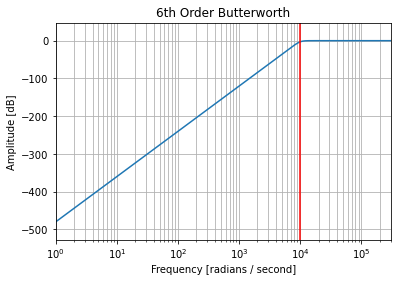

In [719]:
w1 = 10 ** 4

ws = 4 * w1
fs = ws / (2 * np.pi)

Ts = 1/fs
print(f'Ts = {Ts} seconds')

N = 300_000

b, a = signal.butter(6, w1, 'high', analog=True)

print(f'b = {b}')
print(f'a = {a}')
freqs = np.linspace(1, N, N+1)
w, h = signal.freqs(b, a, freqs)

#plt.plot(w,  abs(h))
plt.semilogx(w,  20 * np.log10(abs(h)))

plt.title('6th Order Butterworth')

plt.xlabel('Frequency [radians / second]')

plt.ylabel('Amplitude [dB]')

plt.margins(0, 0.1)

plt.grid(which='both', axis='both')

plt.axvline(w1, color='red') # cutoff frequency

#plt.axhline(-5, color='green') # rp

plt.show()

In [720]:
poles = np.roots(a)

print(zeros)

[0. 0. 0. 0. 0. 0.]


For a Butterworth filter with
$  \omega _1 = 10^4 rads/sec $
<div></div>
Through Partial differentiation we get

Bilinear Method
<div></div>
$ H(z)=  \frac{ \left( \frac{2 (z - 1)}{T (z + 1)} \right)^6}{\left( z- \frac{2+P_1T}{2-P_1T} \right) \left(z- \frac{2+P_1^*T}{2-P_1^*T}\right) \left(z- \frac{2+P_2T}{2-P_2T} \right) \left(z- \frac{2+P_2^*T}{2-P_2^*T} \right) \left(z- \frac{2+P_3T}{2-P_3T} \right) \left(z- \frac{2+P_3^*T}{2-P_3^*T}\right)} $

P1z = (0.18935914456538128+0.7498621280472656j) = 0.7734016399711774e ^ 1.3234423444941594
P2z = (0.18935914456538128-0.7498621280472656j) = 0.7734016399711774e ^ -1.3234423444941594
P3z = (0.14047286893074276+0.4072197316319713j) = 0.43076738123498665e ^ 1.23862214220271
P4z = (0.14047286893074276-0.4072197316319713j) = 0.43076738123498665e ^ -1.23862214220271
P5z = (0.12225101666499184+0.12971794770375306j) = 0.178247179590864e ^ 0.8150238214829177
P6z = (0.12225101666499184-0.12971794770375306j) = 0.178247179590864e ^ -0.8150238214829177
ZPmax1 = 0.7734016399711774


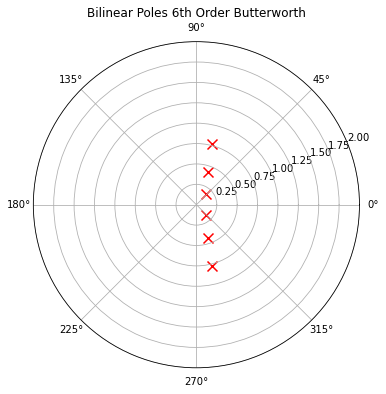

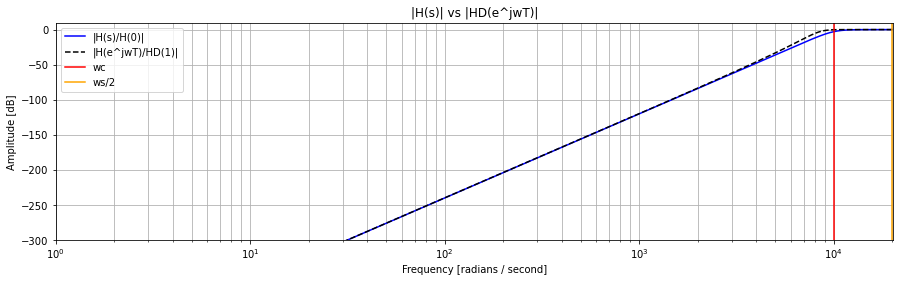

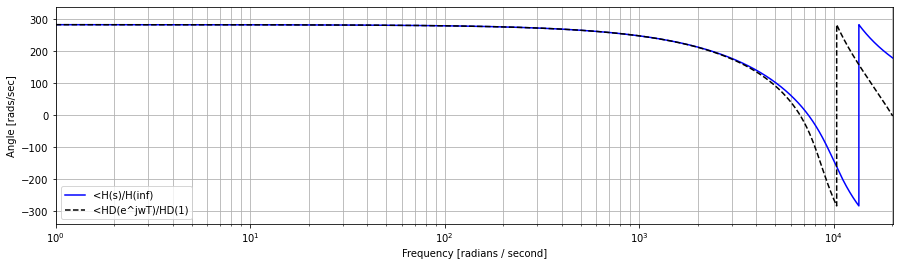

In [725]:
z_bi_poles = (2 + (poles * Ts))/(2 - (poles * Ts))

z = np.e ** (w * complex(0, 1) * Ts)
zs = np.e ** (ws * complex(0, 1) * Ts)


bilin = (2*(z - 1))/(Ts * (z + 1))
numerator = (bilin ** 6) 
Hz_b = (bilin - poles[0]) * (bilin - poles[1]) * (bilin - poles[2]) * (bilin - poles[3]) * (bilin - poles[4]) * (bilin - poles[5])
Hz_b = numerator / Hz_b

other_bilin = (2*(zs - 1))/(Ts * (zs + 1))
other_num = (other_bilin) ** 6 

Hz_epit = other_num/(other_bilin - poles[0]) * (other_bilin - poles[1]) * (other_bilin - poles[2]) * (other_bilin - poles[3]) * (other_bilin - poles[4]) * (other_bilin - poles[5])


for i in range(len(z_bi_poles)):
    print(f'P{i+1}z = {z_bi_poles[i]} = {np.abs(z_bi_poles[i])}e ^ {np.angle(z_bi_poles[i])}')

nn = int(2 * np.pi * 3_200) + 1

print(f'ZPmax1 = {max(np.abs(z_bi_poles))}')

fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(projection='polar')
ax.set_title("Bilinear Poles 6th Order Butterworth")
ax.set_ylim([0,2])
c = ax.scatter(np.angle(z_bi_poles), np.abs(z_bi_poles), s=100, c='red', marker='x')
plt.show()

plt.figure().set_figwidth(15)
plt.margins(0, 0.1)
plt.semilogx(w[:nn],  20 * np.log10(np.abs(h[:nn]/h[nn])), '-', c='blue', label = '|H(s)/H(0)|')
plt.semilogx(w[:nn], 20 * np.log10(np.abs(Hz_b[:nn])), '--', c='black', label = '|H(e^jwT)/HD(1)|')
plt.ylim(-300,10)
plt.title('|H(s)| vs |HD(e^jwT)|')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.grid(which='both', axis='both')
plt.axvline(w1, color='red', label='wc') # cutoff frequency
plt.axvline(ws/2, color='orange', label = 'ws/2') # cutoff frequency
plt.legend()
plt.show()


plt.figure().set_figwidth(15)
plt.margins(0, 0.1)
plt.ylabel('Angle [rads/sec]')
plt.xlabel('Frequency [radians / second]')
plt.semilogx(w[:nn], 90 * np.angle(h[:nn]), '-', c='blue', label = '<H(s)/H(inf)')
plt.semilogx(w[:nn], 90 * np.angle(Hz_b[:nn]), '--', c='black', label = '<HD(e^jwT)/HD(1)')
plt.grid(which='both', axis='both')
plt.legend()
plt.show()
